In [1]:
from keras.datasets import imdb
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

import matplotlib.pyplot as plt

In [2]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()

In [3]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_x[0]])
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Encoding the integer sequence into a binary matrix

In [4]:
def vectorize_sequence(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence]= 1
    return result

In [5]:
train_x = vectorize_sequence(train_x)
test_x = vectorize_sequence(test_x)

In [6]:
train_y = np.array(train_y).astype('float32')
test_y = np.array(test_y).astype('float32')

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [9]:
val_x = train_x[:10000]
partial_train_x = train_x[10000:]
val_y = train_y[:10000]
partial_trail_y = train_y[10000:]

In [10]:
history = model.fit(partial_train_x,partial_trail_y,
                    epochs=4,
                    batch_size=512,
                    validation_data=(val_x, val_y))

Epoch 1/4
30/30 [==============================] - 1s 28ms/step - loss: 0.5154 - binary_accuracy: 0.7865 - val_loss: 0.4023 - val_binary_accuracy: 0.8599
Epoch 2/4
30/30 [==============================] - 0s 14ms/step - loss: 0.3191 - binary_accuracy: 0.9001 - val_loss: 0.3119 - val_binary_accuracy: 0.8859
Epoch 3/4
30/30 [==============================] - 0s 14ms/step - loss: 0.2322 - binary_accuracy: 0.9279 - val_loss: 0.2829 - val_binary_accuracy: 0.8890
Epoch 4/4
30/30 [==============================] - 0s 14ms/step - loss: 0.1831 - binary_accuracy: 0.9406 - val_loss: 0.2744 - val_binary_accuracy: 0.8896


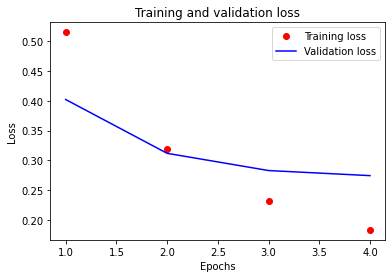

In [11]:
history_dict = history.history

def plot_loss(hist):
    loss_values = hist['loss']
    val_loss_values = hist['val_loss']

    epochs= range(1, len(val_loss_values)+1)

    plt.plot(epochs, loss_values, 'ro', label= 'Training loss')
    plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_loss(history_dict)

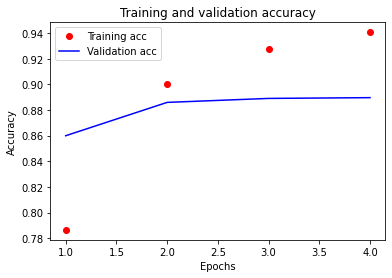

In [12]:
def plot_acc(hist):
    acc_values = hist['binary_accuracy']
    val_acc_values = hist['val_binary_accuracy']

    epochs= range(1, len(val_acc_values)+1)

    plt.plot(epochs, acc_values, 'ro', label= 'Training acc')
    plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
plot_acc(history_dict)

In [13]:
results = model.evaluate(test_x, test_y)
results

782/782 [==============================] - 1s 854us/step - loss: 0.2918 - binary_accuracy: 0.8822


[0.29176008701324463, 0.8822399973869324]

### Model with more hidden layers

Epoch 1/4
30/30 [==============================] - 1s 26ms/step - loss: 0.5546 - binary_accuracy: 0.7668 - val_loss: 0.4095 - val_binary_accuracy: 0.8652
Epoch 2/4
30/30 [==============================] - 0s 14ms/step - loss: 0.3233 - binary_accuracy: 0.8949 - val_loss: 0.3116 - val_binary_accuracy: 0.8814
Epoch 3/4
30/30 [==============================] - 0s 14ms/step - loss: 0.2226 - binary_accuracy: 0.9271 - val_loss: 0.2824 - val_binary_accuracy: 0.8864
Epoch 4/4
30/30 [==============================] - 0s 14ms/step - loss: 0.1727 - binary_accuracy: 0.9408 - val_loss: 0.2787 - val_binary_accuracy: 0.8891


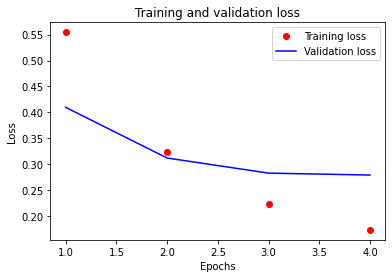

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(partial_train_x,partial_trail_y,
                    epochs=4,
                    batch_size=512,
                    validation_data=(val_x, val_y))


plot_loss(history.history)


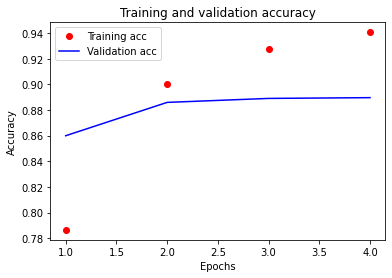

In [15]:
plot_acc(history_dict)

In [16]:
results = model.evaluate(test_x, test_y)
results

782/782 [==============================] - 1s 840us/step - loss: 0.2941 - binary_accuracy: 0.8817


[0.2940908670425415, 0.8816800117492676]

### Model with more hidden units

Epoch 1/4
30/30 [==============================] - 1s 26ms/step - loss: 0.5178 - binary_accuracy: 0.7791 - val_loss: 0.3662 - val_binary_accuracy: 0.8739
Epoch 2/4
30/30 [==============================] - 0s 16ms/step - loss: 0.2887 - binary_accuracy: 0.9025 - val_loss: 0.2890 - val_binary_accuracy: 0.8860
Epoch 3/4
30/30 [==============================] - 0s 16ms/step - loss: 0.1999 - binary_accuracy: 0.9306 - val_loss: 0.2743 - val_binary_accuracy: 0.8895
Epoch 4/4
30/30 [==============================] - 0s 16ms/step - loss: 0.1590 - binary_accuracy: 0.9453 - val_loss: 0.3161 - val_binary_accuracy: 0.8773


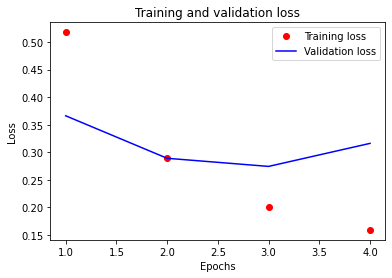

In [17]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(partial_train_x,partial_trail_y,
                    epochs=4,
                    batch_size=512,
                    validation_data=(val_x, val_y))


plot_loss(history.history)


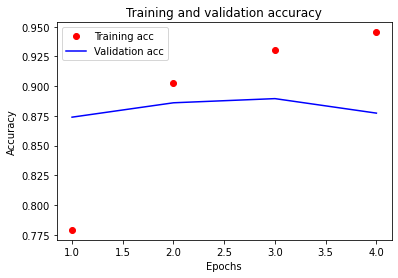

In [18]:
plot_acc(history.history)

In [19]:
results = model.evaluate(test_x, test_y)
results

782/782 [==============================] - 1s 938us/step - loss: 0.3332 - binary_accuracy: 0.8688


[0.3331785500049591, 0.8688399791717529]

### Model with tanh relu function

Epoch 1/4
30/30 [==============================] - 1s 24ms/step - loss: 0.4788 - binary_accuracy: 0.7961 - val_loss: 0.3491 - val_binary_accuracy: 0.8777
Epoch 2/4
30/30 [==============================] - 0s 15ms/step - loss: 0.2679 - binary_accuracy: 0.9104 - val_loss: 0.2905 - val_binary_accuracy: 0.8845
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.1927 - binary_accuracy: 0.9345 - val_loss: 0.2718 - val_binary_accuracy: 0.8900
Epoch 4/4
30/30 [==============================] - 0s 14ms/step - loss: 0.1441 - binary_accuracy: 0.9500 - val_loss: 0.2864 - val_binary_accuracy: 0.8850


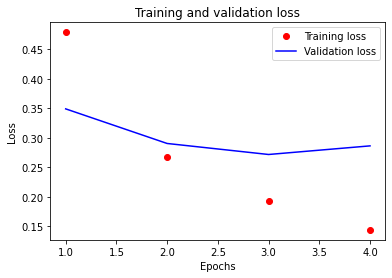

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(partial_train_x,partial_trail_y,
                    epochs=4,
                    batch_size=512,
                    validation_data=(val_x, val_y))


plot_loss(history.history)

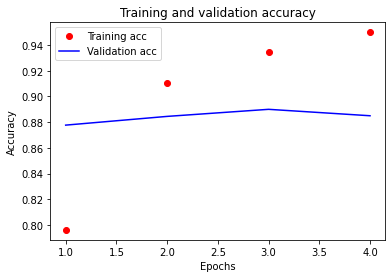

In [21]:
plot_acc(history.history)

In [22]:
results = model.evaluate(test_x, test_y)
results

782/782 [==============================] - 1s 859us/step - loss: 0.3109 - binary_accuracy: 0.8755


[0.3109445571899414, 0.8755199909210205]